Bounds (limites)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
kma=77e9;
muma=32e9;
kfl=1.6e9;
mufl=0;
rhoma=2.71e3;
rhofl=8.3e2;
b=0
phi=np.zeros([101])
kv=np.zeros([101])
muv=np.zeros([101])
kr=np.zeros([101])
mur=np.zeros([101])
kvrh=np.zeros([101])
muvrh=np.zeros([101])
khsupper=np.zeros([101])
khslower=np.zeros([101])
muhsupper=np.zeros([101])
muhslower=np.zeros([101])

In [3]:
for a in range(0,101):
    b=a/100
    phi[a]=b
    rhobulk=(1-b)*rhoma+rhofl*b
    #Voigt upper
    kv[a]=(1-b)*kma+b*kfl
    muv[a]=(1-b)*muma
    
    #Reus lower
    kr[a]=1/((1-b)/kma+b/kfl)
    mur[a]=0
    if b==0:
        mur[a]=muma
    
    #Voigt-Reuss-Hill
    kvrh[a]=(kv[a]+kr[a])/2
    muvrh[a]=(muv[a]+mur[a])/2
    
    #Hashin-Shtrikman
    khsupper[a]=kma+(b)/(((1/(kfl-kma))+(1-b)/(kma+4*muma/3)))
    khslower[a]=kfl+(1-b)/((1/(kma-kfl)+b/kfl))
    muhsupper[a]=muma+b/((2*(1-b)*(muma+2*kma))/(5*kma*(muma+(4/3)*kma))-1/muma)
    muhslower[a]=0
    if b==0:
        muhslower[a]=muma

Text(0.5, 1.0, 'Modelo de Limites')

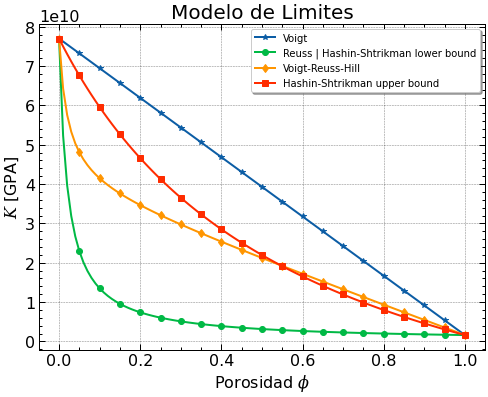

In [4]:
fig, ax = plt.subplots()
ax.plot(phi,kv,'-*',label='Voigt',markevery=5)
ax.plot(phi,kr,'-o',label='Reuss | Hashin-Shtrikman lower bound',markevery=5)
ax.plot(phi,kvrh,'-d',label='Voigt-Reuss-Hill',markevery=5)
ax.plot(phi,khsupper,'-s',label='Hashin-Shtrikman upper bound',markevery=5)
legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')

plt.xlabel("Porosidad $\it{\phi}$")
plt.ylabel("$\it{K}$ [GPA]")
plt.title("Modelo de Limites", fontsize=20)